# 모듈가져오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 파일불러오기

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9.파이널프로젝트/data/분류_은행이탈데이터/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9.파이널프로젝트/data/분류_은행이탈데이터/test.csv')

In [ ]:
display(train.head(2))
display(test.head(2))

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27


In [ ]:
# 피처 확인
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# 데이터 시각화

## 피처별 시각화

### train 데이터 이탈 유무 시각화

- 'Exited'
- 1=예, 0=아니오

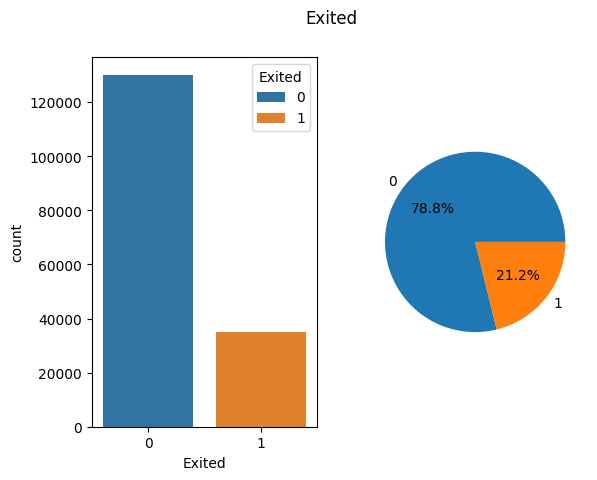

In [4]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(data=train, x='Exited', hue='Exited', ax=ax[0])
train['Exited'].value_counts().plot.pie(autopct='%1.1F%%', ax=ax[1])
ax[1].set_ylabel('')
plt.suptitle('Exited')
plt.show()

# 이탈하지 않은 고객은 전체의 78.8%, 이탈한 고객은 전체의 21.2%로 이탈하지 않은 고객이 이탈한 고객보다 3.7배 정도 더 많다

### countplot

- 지역, 성별, 이용기간, 이용 상품수, 신용카드 여부, 활동여부

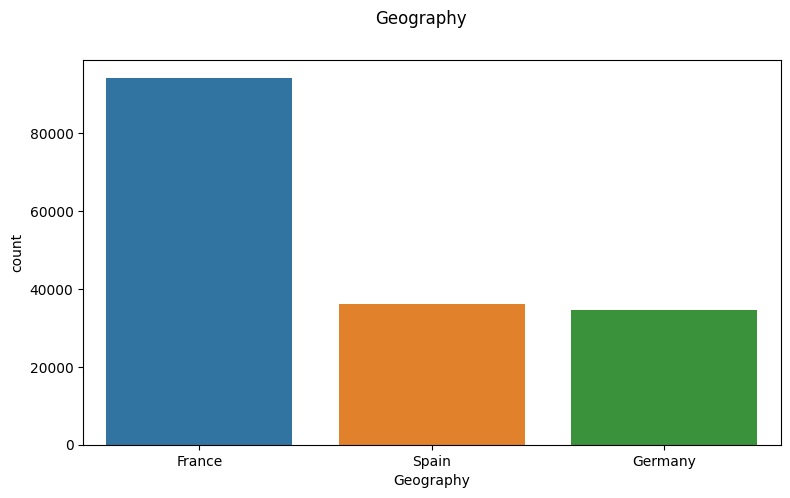

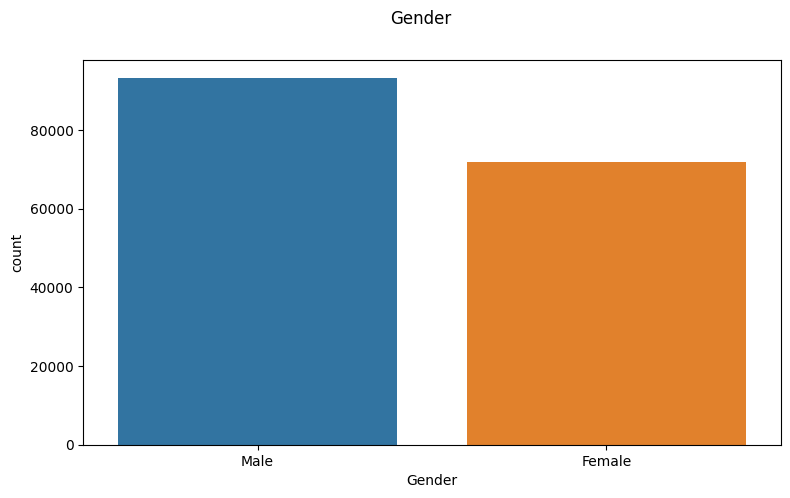

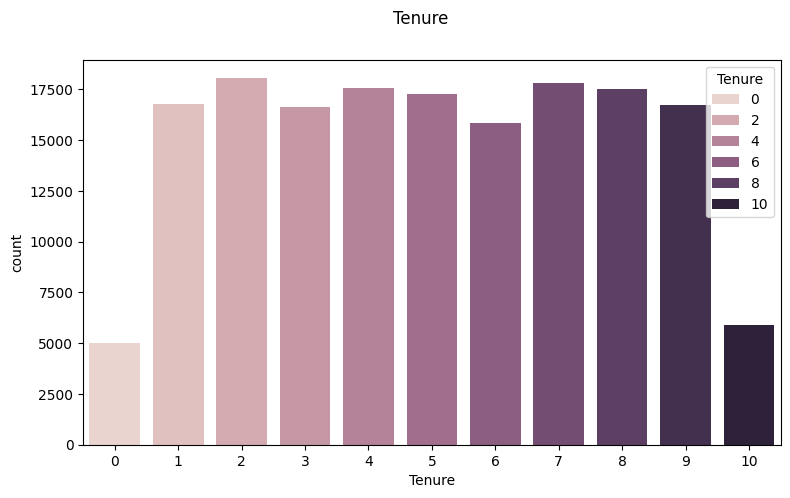

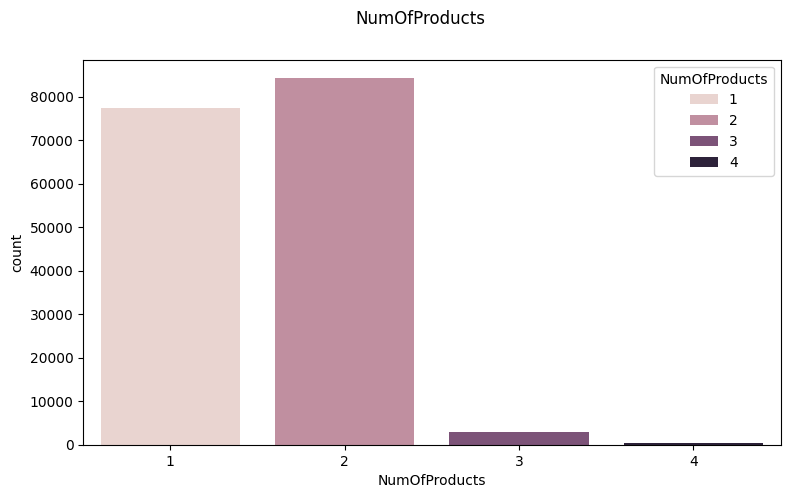

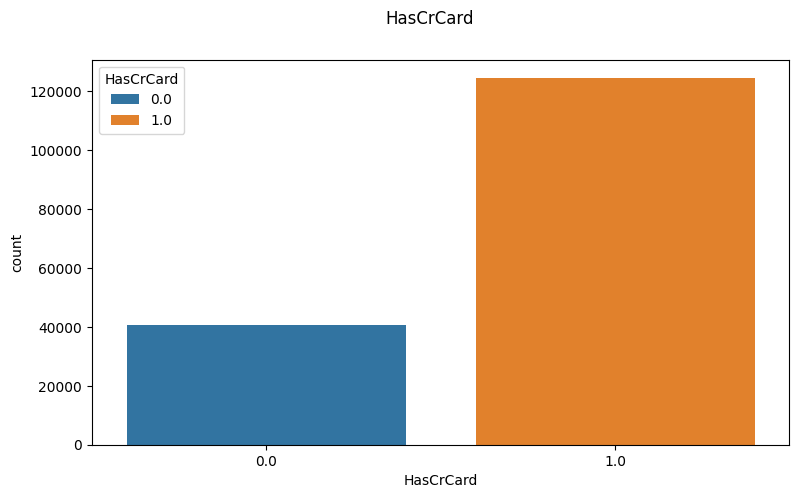

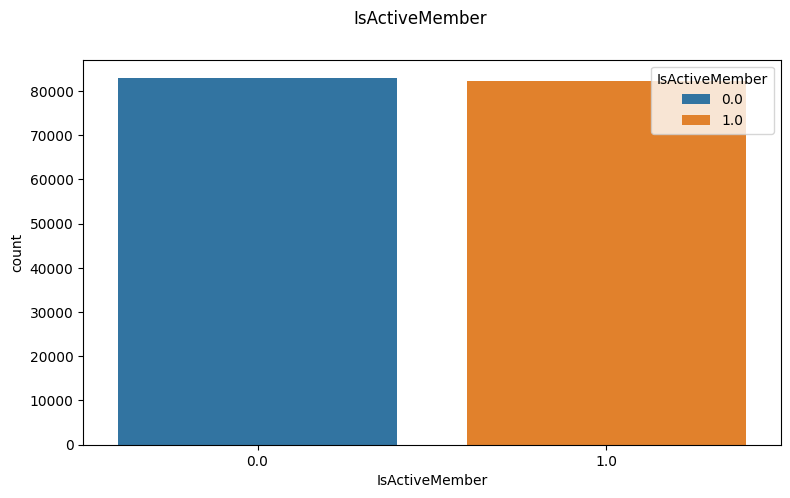

In [ ]:
cnt_col=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for column in cnt_col:
    fig=plt.figure(figsize=(9,5))
    sns.countplot(data=train, x=column, hue=column)
    plt.suptitle(f'{column}')
    plt.show()

# 지역        : 프랑스, 스페인, 독일 세 국가가 존재하며 프랑스가 제일 많고 스페인과 독일은 수가 비슷하다
# 성별        : 남성이 여성보다 더 많다
# 이용기간     : 1년 ~ 9년 값이 고르게 분포한다
# 이용 상품수  : 1~2개 상품을 이용하는 고객이 압도적으로 많고, 2개-1개-3개-4개 순으로 많다
# 신용카드여부 : 신용카드를 보유한 고객이 3배 정도 더 많다
# 활동여부     : 활동하는 고객과 활동하지 않는 고객의 수는 비슷하나 활동하지 않는 고객이 미세하게 더 많다

#### 이탈여부와 비교

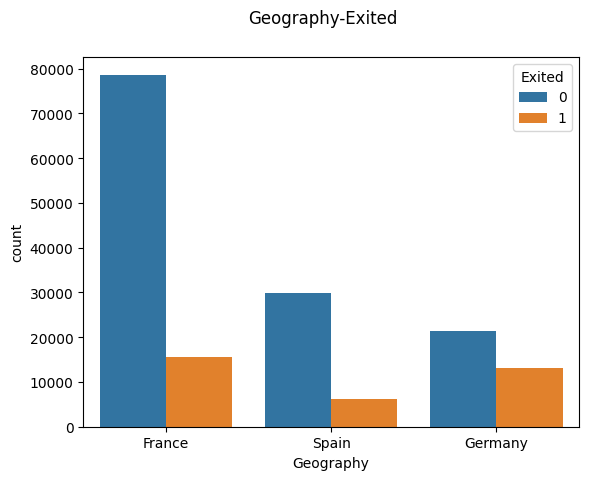

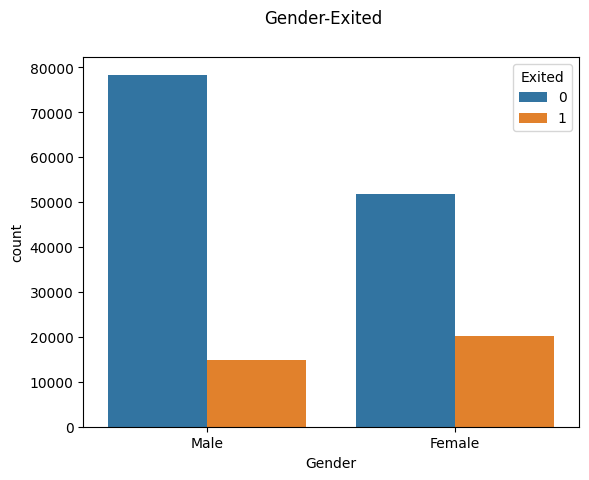

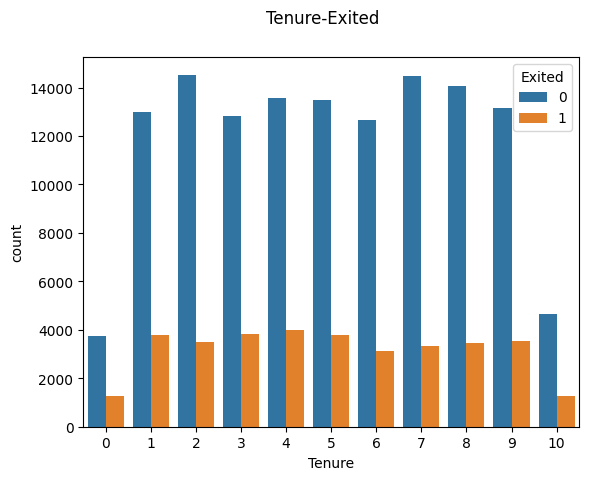

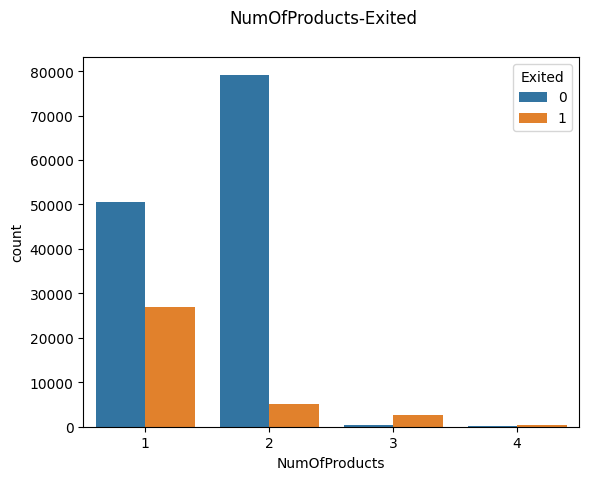

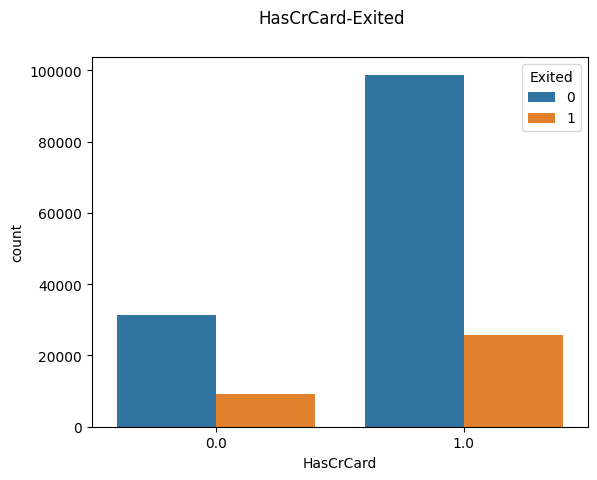

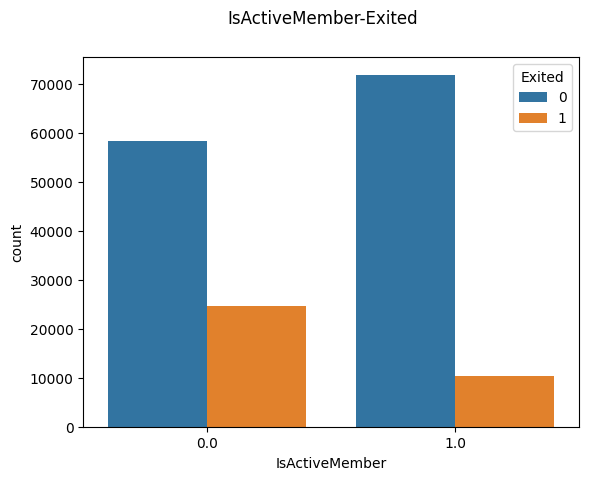

In [6]:
cnt_col=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for column in cnt_col:
    sns.countplot(data=train, x=column, hue='Exited', legend=True)
    plt.suptitle(f'{column}-Exited')
    plt.show()

# 지역 : 이탈하지 않은 고객이 더 많다
#      - 프랑스, 스페인 : 이탈하지 않은 고객 수가 이탈한 고객 수 보다 훨씬 많다
#      - 독일 : 이탈하지 않은 고객 수가 더 많지만 프랑스,스페인에 비해 이탈한 고객 수 비율이 높아 보인다
# 성별 : 여성 고객 중 이탈한 고객 수 비율이 남성보다 높아 보인다
# 이용기간     : 은행 이용 기간과 상관없이 비슷한 양상을 보인다
# 이용 상품수 1,2개 : 이탈하지 않은 고객이 대부분이다
# 이용 상품수 3,4개 : 이탈한 고객수가 조금 더 많다
# 신용카드여부 : 이탈하지 않은 고객 비율이 높다
# 활동여부     : 이탈하지 않은 고객 비율이 높다

### histogram

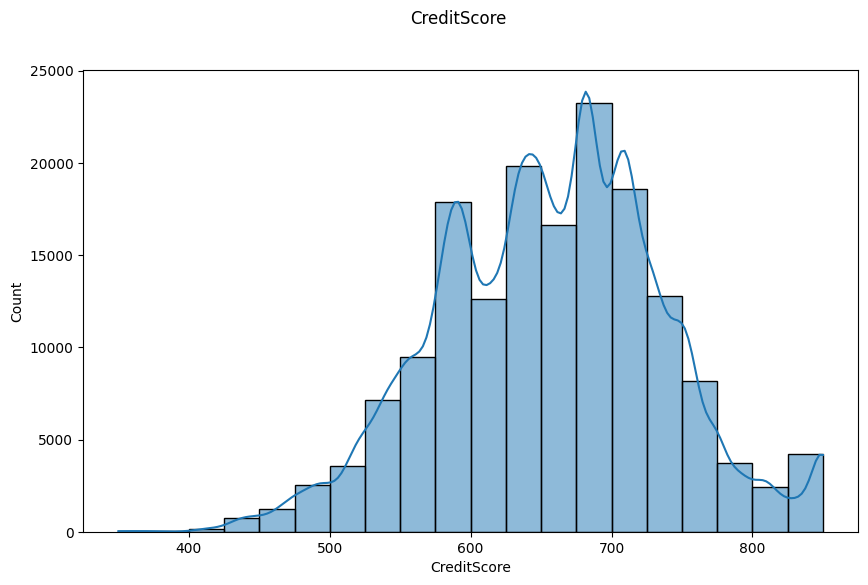

In [ ]:
# CreditScore 신용점수
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='CreditScore', bins=20, legend=False, kde=True)
plt.suptitle('CreditScore')

plt.show()

# 575~725점 사이가 가장 많이 분포한다

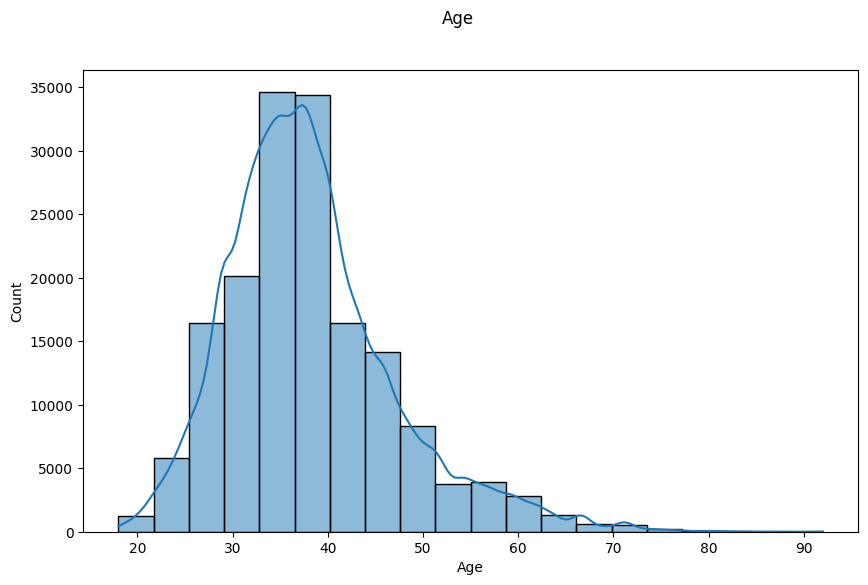

In [ ]:
# Age 연령
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', bins=20, legend=False, kde=True)
plt.suptitle('Age')

plt.show()

# 30~40대가 가장 많이 분포, 연령대가 올라갈수록 고객수가 적다

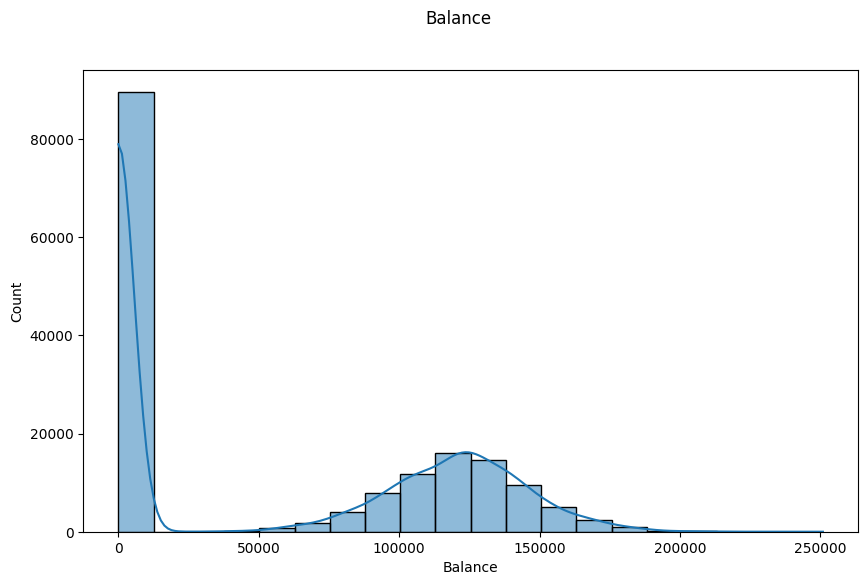

In [ ]:
# Balance 계좌 잔고
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Balance', bins=20, legend=False, kde=True)
plt.suptitle('Balance')

plt.show()

# 잔고가 0인 값이 너무 많다
# 0을 제외하고 100,000 ~ 150,000가 가장 많이 분포한다

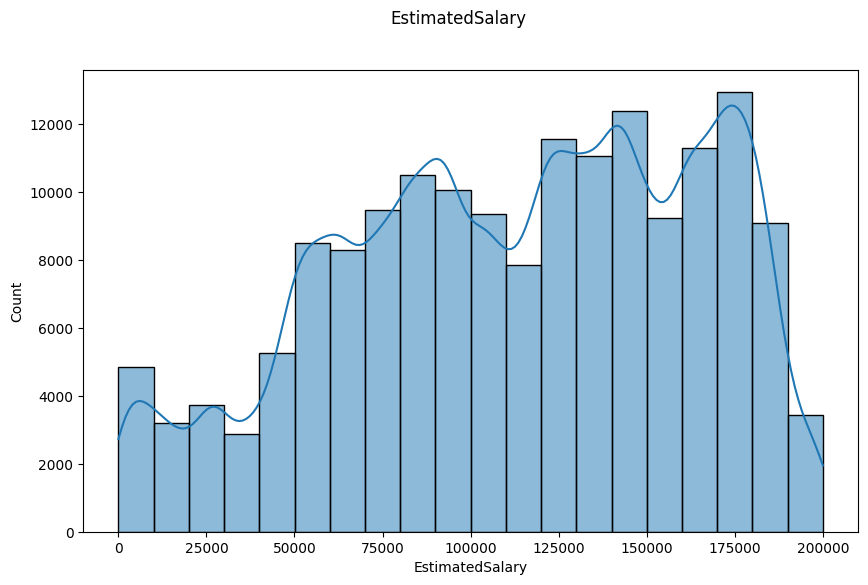

In [ ]:
# EstimatedSalary 고객추정급여
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='EstimatedSalary', bins=20, legend=False, kde=True)
plt.suptitle('EstimatedSalary')

plt.show()

### boxplot (이상치 확인)

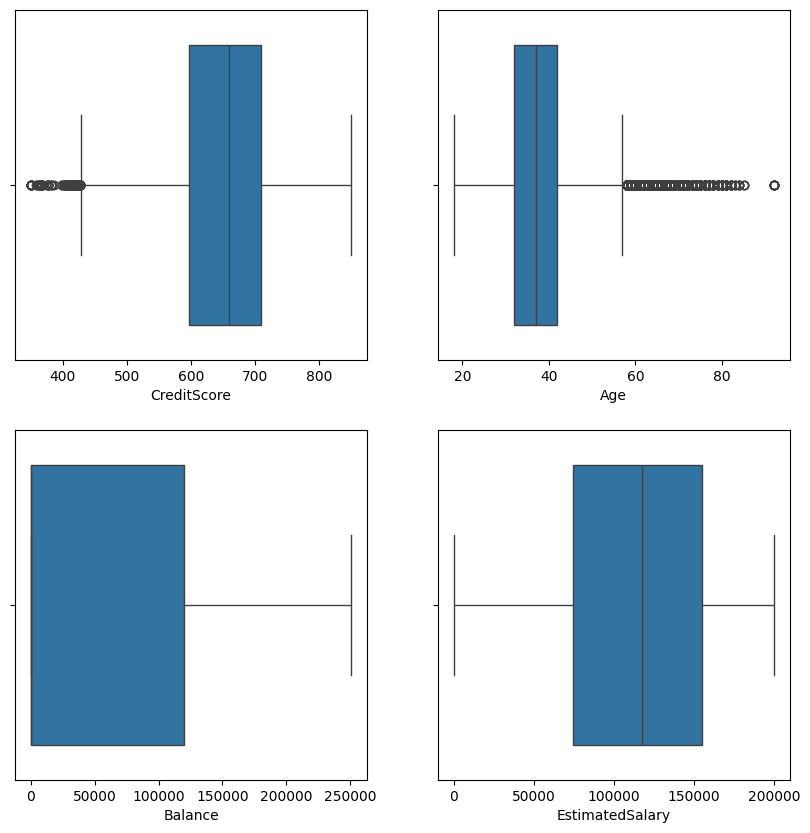

In [ ]:
# 수치형 데이터 ['CreditScore','Age','Balance','EstimatedSalary']
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 10)

sns.boxplot(data=train, x='CreditScore', ax=axes[0,0])
sns.boxplot(data=train, x='Age', ax=axes[0,1])
sns.boxplot(data=train, x='Balance', ax=axes[1,0])
sns.boxplot(data=train, x='EstimatedSalary', ax=axes[1,1])

plt.show()

# CreditScore, Age : 이상치가 많으나 가설검증에 필요하므로 제거하지 않음
# Balance : 0인 값이 많음, 이상치 없음
# EstimatedSalary : 이상치 없음

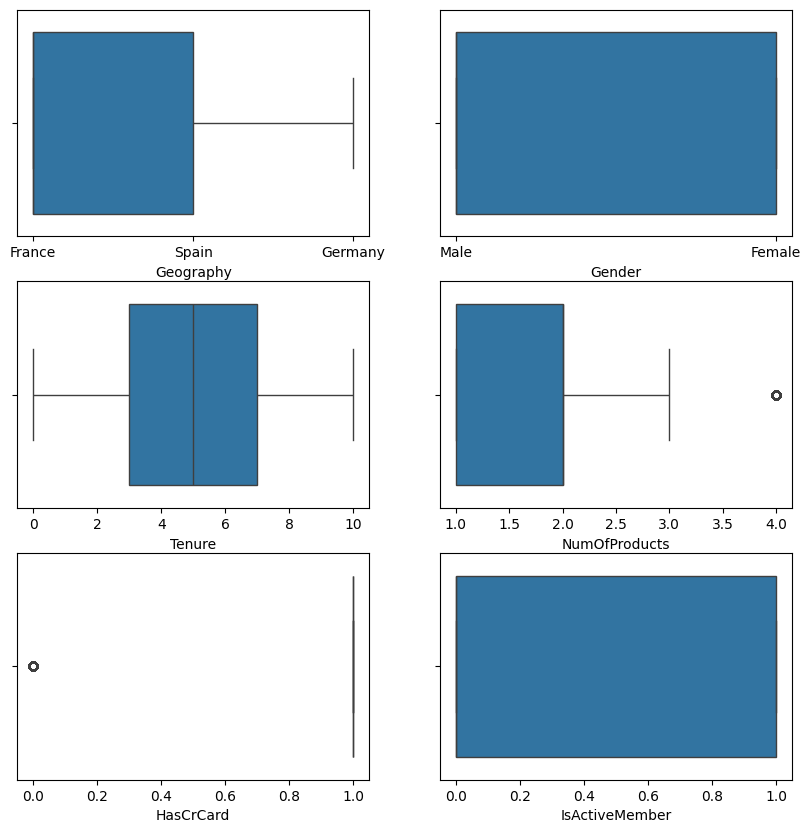

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 10)

sns.boxplot(data=train, x='Geography', ax=axes[0,0])
sns.boxplot(data=train, x='Gender', ax=axes[0,1])
sns.boxplot(data=train, x='Tenure', ax=axes[1,0])
sns.boxplot(data=train, x='NumOfProducts', ax=axes[1,1])
sns.boxplot(data=train, x='HasCrCard', ax=axes[2,0])
sns.boxplot(data=train, x='IsActiveMember', ax=axes[2,1])

plt.show()

### 상관계수 시각화

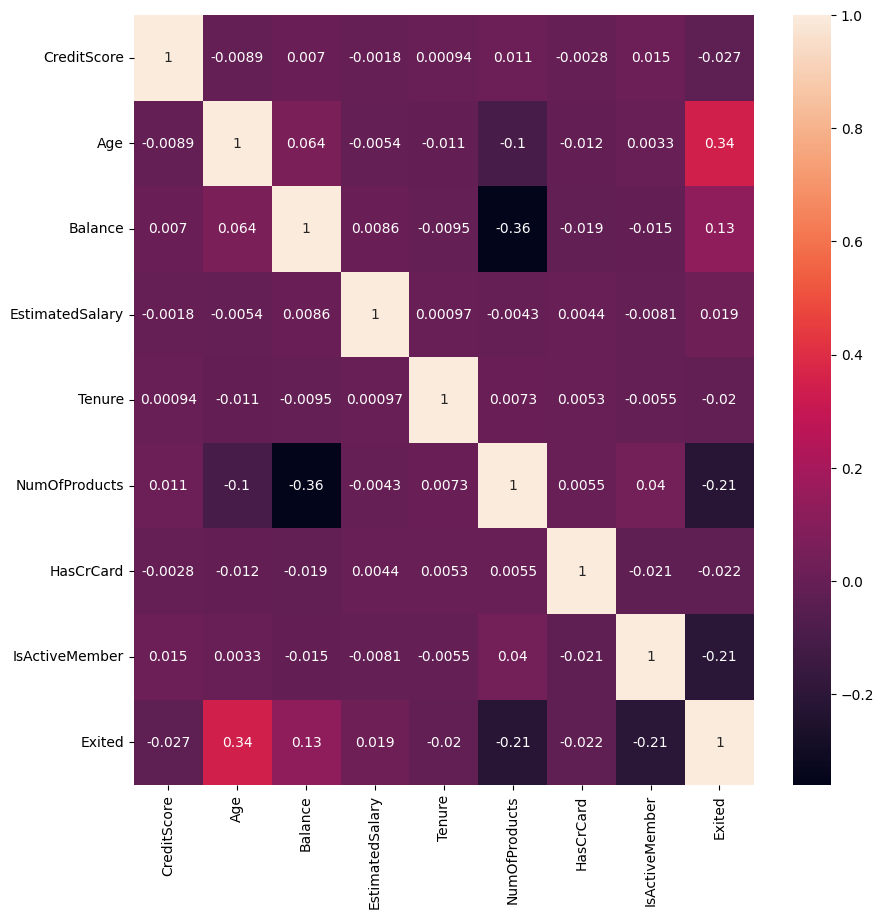

In [ ]:
# 상관계수
df_train = train[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

## 가설 설정에 따른 시각화

- 가설 설정
    - 고객 이탈 현상은 고객의 연령대와 상관관계가 있을 것이다.
    - 고객 이탈 현상과 신용 점수, 계좌 잔고, 급여는 밀접한 연관이 있을 것이다.
    - 은행 이용 기간이 길수록 이탈율이 낮을 것이다.

### 가설1 : 고객 이탈 현상은 고객의 연령대와 상관관계가 있을 것이다.

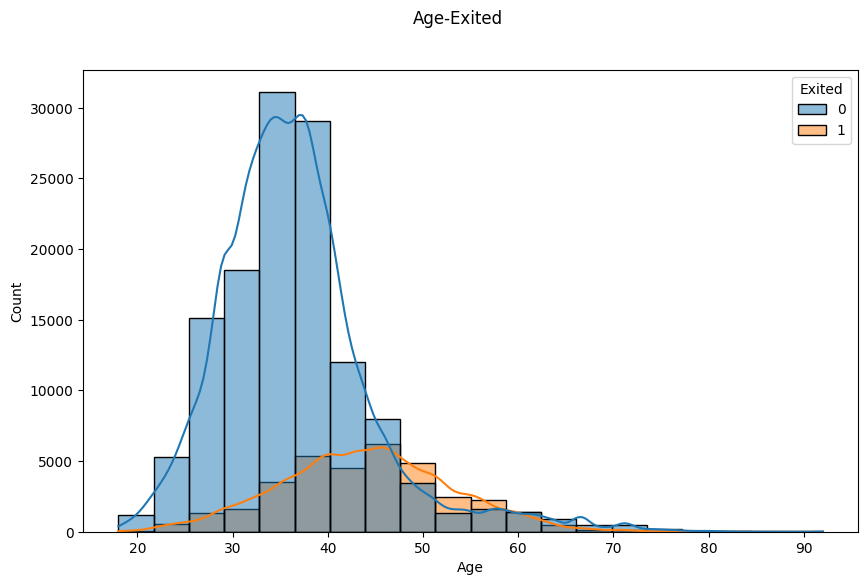

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', bins=20, hue='Exited',legend=True, kde=True)
plt.suptitle('Age-Exited')

plt.show()

# 30대 후반~50대 중반 연령대에서 이탈한 고객이 많은 것으로 보인다

### 가설2 : 고객 이탈 현상과 신용 점수, 계좌 잔고, 급여는 밀접한 연관이 있을 것이다.


- 각 변수 간에 이탈여부는 비슷한 양상을 보임

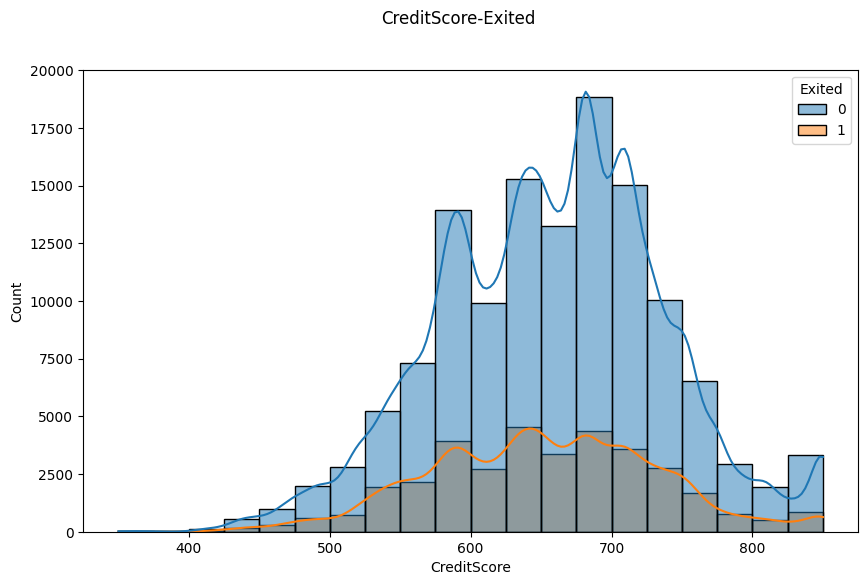

In [ ]:
# 신용점수
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='CreditScore', bins=20, hue='Exited',legend=True, kde=True)
plt.suptitle('CreditScore-Exited')

plt.show()

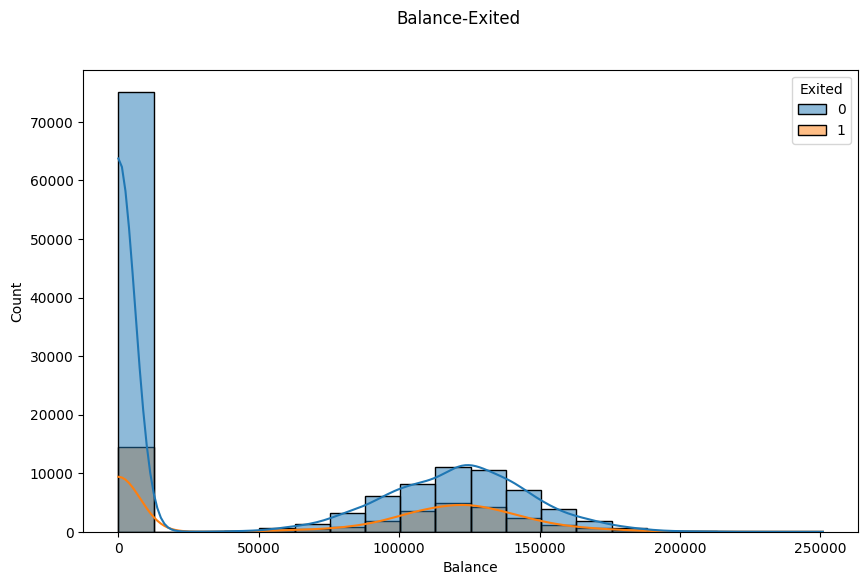

In [ ]:
# 계좌잔고
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Balance', bins=20, hue='Exited',legend=True, kde=True)
plt.suptitle('Balance-Exited')

plt.show()

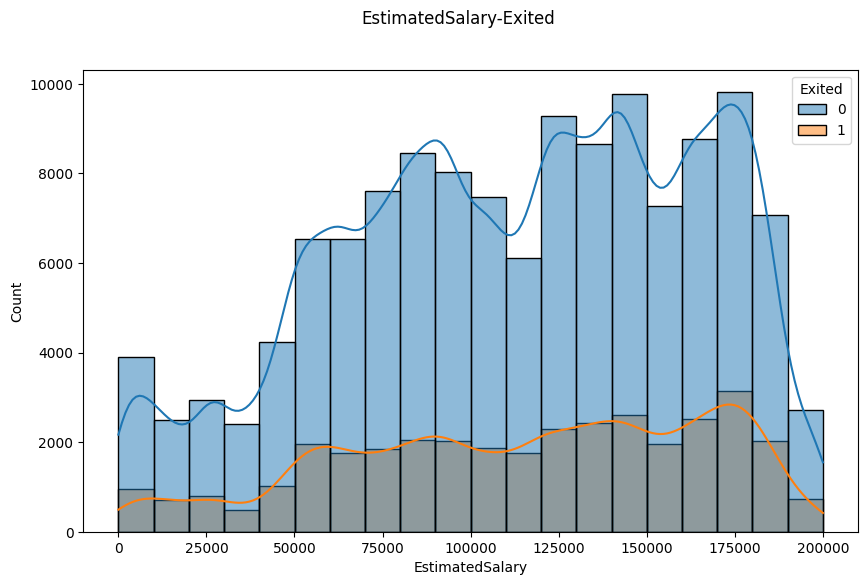

In [ ]:
# 고객 추정 급여
fig=plt.figure(figsize=(10,6))
sns.histplot(data=train, x='EstimatedSalary', bins=20, hue='Exited',legend=True, kde=True)
plt.suptitle('EstimatedSalary-Exited')

plt.show()

### 가설3 : 은행 이용 기간이 길수록 이탈율이 낮을 것이다.

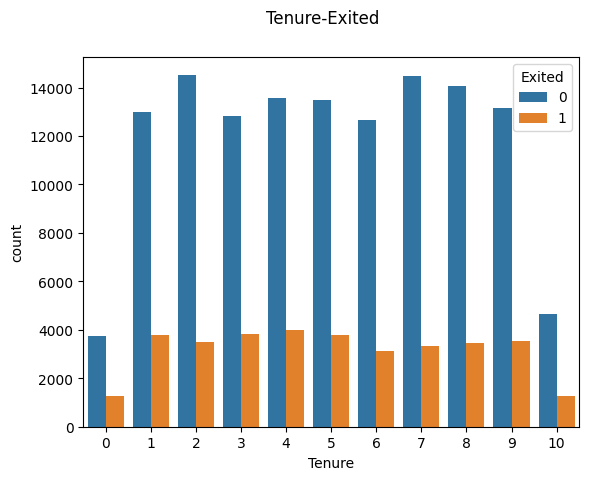

In [3]:
sns.countplot(data=train, x='Tenure', hue='Exited', legend=True)
plt.suptitle('Tenure-Exited')
plt.show()

# 은행 이용 기간과 상관없이 비슷한 양상을 보인다